In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
# We are going to try to solve a simple differential for 1D motion with constant force, using a matrix approach:

In [31]:
t = np.linspace(0, 20, 201)
x = np.zeros_like(t)
v = np.zeros_like(t)
F = 0.1  # constant acceleration
m = 1.0 # mass
a = F / m  # acceleration

In [ ]:
# Then we have x_total, which is the distance traveled
x_total = 20.0
dt = t[1] - t[0]

# Set-up the right hand side of the equations
b = np.zeros(len(t))
b[0] = 0.0
b[-1] = x_total
b[1:-1] = F

# Set-up the matrix A
A = np.zeros((len(t), len(t)))
A[0, 0] = 1.0
A[-1, -1] = 1.0
for i in range(1, len(t)-1):
    A[i, i-1] = m / dt**2
    A[i, i] = -2.0 * m / dt**2
    A[i, i+1] = m / dt**2


# Replace with the boundary condition that starting v = 0
A[-1, 1] = 1.0 / dt
A[-1, 0] = -1.0 / dt
b[-1] = 0.0

# This up there does not seem to work, is there a more accurate solution for v=0 at the boundary?


In [42]:
print (b)

[0.  0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0. ]


In [43]:
x = np.linalg.solve(A, b)
print(x)

[ 1.40367717e-12 -9.47619048e-02 -1.88523810e-01 -2.81285714e-01
 -3.73047619e-01 -4.63809524e-01 -5.53571429e-01 -6.42333333e-01
 -7.30095238e-01 -8.16857143e-01 -9.02619048e-01 -9.87380952e-01
 -1.07114286e+00 -1.15390476e+00 -1.23566667e+00 -1.31642857e+00
 -1.39619048e+00 -1.47495238e+00 -1.55271429e+00 -1.62947619e+00
 -1.70523810e+00 -1.78000000e+00 -1.85376190e+00 -1.92652381e+00
 -1.99828571e+00 -2.06904762e+00 -2.13880952e+00 -2.20757143e+00
 -2.27533333e+00 -2.34209524e+00 -2.40785714e+00 -2.47261905e+00
 -2.53638095e+00 -2.59914286e+00 -2.66090476e+00 -2.72166667e+00
 -2.78142857e+00 -2.84019048e+00 -2.89795238e+00 -2.95471429e+00
 -3.01047619e+00 -3.06523810e+00 -3.11900000e+00 -3.17176190e+00
 -3.22352381e+00 -3.27428571e+00 -3.32404762e+00 -3.37280952e+00
 -3.42057143e+00 -3.46733333e+00 -3.51309524e+00 -3.55785714e+00
 -3.60161905e+00 -3.64438095e+00 -3.68614286e+00 -3.72690476e+00
 -3.76666667e+00 -3.80542857e+00 -3.84319048e+00 -3.87995238e+00
 -3.91571429e+00 -3.95047

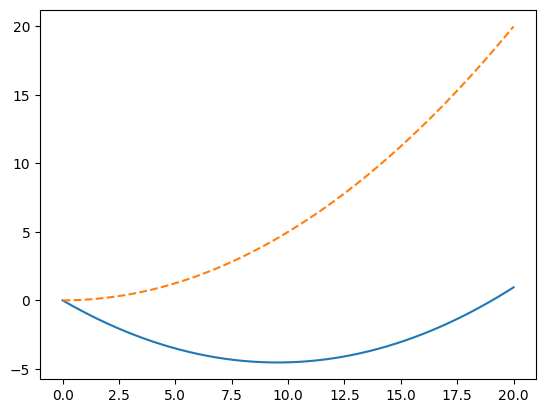

In [44]:
plt.plot(t, x)
plt.plot(t, 0.5 * a * t**2, '--')